# Lab 8 - drzewa decyzyjne i lasy losowe

Drzewa decyzyjne są klasyfikatorami działającymi metodą hierarchiczną, ilustrującymi dodatkowo proces decyzyjny w sposób graficzny.

## Przykładowe drzewo decyzyjne

Poniższe drzewo decyzyjne ilustruje proces podejmowania decyzji odnośnie gry w tenisa w zależności od warunków pogodowych.

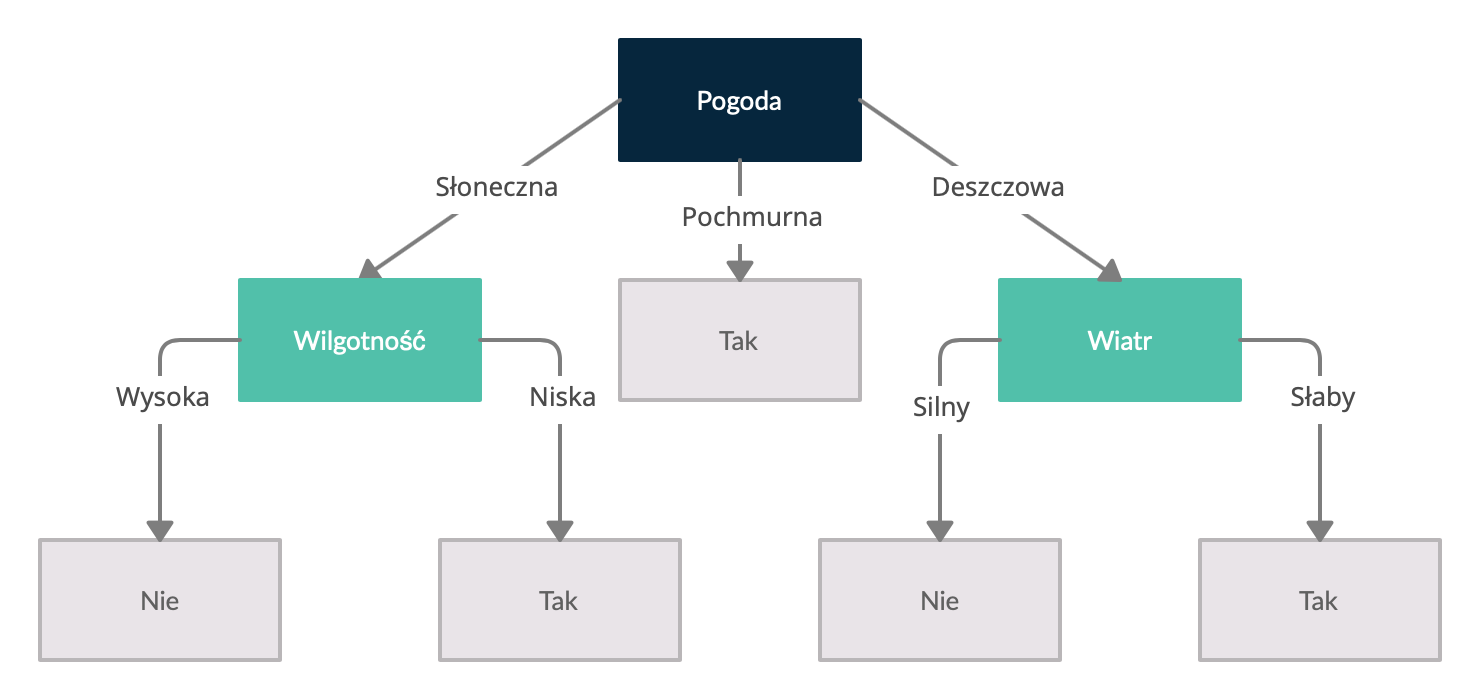

1. Jaką decyzję podejmiemy przy słonecznej pogodzie i wysokiej wilgotności powietrza?
2. Jaką decyzję podejmiemy przy pogodzie pochmurnej i niskiej wilgotności powietrza?

## Uczenie drzewa decyzyjnego

Uczenie (formowanie) drzewa decyzyjnego odbywa się na podstawie danych w formie systemu decyzyjnego.

Metodę uczenia drzewa decyzyjnego można uogólnić następującymi krokami:
- znalezienie atrybutu w systemie treningowym atrybutu niosącego najwięcej informacji, a następnie podzielenie systemu na kategorie według tego atrybutu.
- powtarzanie procesu do osiągnięcia pewnego założonego progu

Do podziału systemu decyzyjnego na podkategorie można wykorzystać następujące miary:
- Zysk informacyjny
- Niejednorodność Giniego

### Zysk informacyjny

Zysk informacyjny jest miarą zgodności badanego atrybutu z celem.

Miarę zysku informacyjnego można wyrazić wzorem:

$Gain(S, A) = Entropy(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} Entropy(S_v)$

gdzie:
- S oznacza zbiór obiektów w systemie decyzyjnym
- A oznacza badany atrybut
- $ Entropy(S) = \sum_{i=1}^n -p_i log_2(p_i) $, gdzie:
    - $n$ oznacza liczbę klas atrybutów
    - $p_i$ oznacza prawdopodobieństwo wystąpienia wartości atrybutu w systemie decyzyjnym

### Niejednorodność Giniego

Niejednorodność Giniego jest miarą probabilistyczną definiującą prawdopodobieństwo przydzielenia błędnej decyzji za pomocą
badanego atrybutu, co można wyrazić następującym wzorem:

$I_{G}(A) = 1 - \sum_{i=1}^n p(A_i)^2$

gdzie:
- f oznacza badany atrybut
- n oznacza liczbę wartości w badanym atrybucie
- $p(f_i)$ oznacza prawdopodobieństwo wystąpienia wartości badanego atrybutu w i-tej klasie decyzyjnej

Podczas wyznaczania podziału systemu decyzyjnego należy wybrać atrybut, dla którego wartośc zysku informacyjnego jest
największa lub wartość niejednorodności Giniego jest najmniejsza.

## Przykład uczenia drzewa decyzyjnego

Rozważmy następujący system decyzyjny obrazujący cele wycieczek w Tatrach pewnego turysty A:

| LP | pogoda     | sezon letni | pora dnia  | cel wycieczki |
| -- | ---------- | ----------- | ---------- | ------------- |
| 1  | słonecznie | tak         | rano       | szczyt        |
| 2  | słonecznie | nie         | rano       | dolina        |
| 3  | wietrznie  | tak         | rano       | szczyt        |
| 4  | deszczowo  | tak         | popołudnie | szczyt        |
| 5  | deszczowo  | nie         | rano       | Krupówki      |
| 6  | deszczowo  | tak         | rano       | szczyt        |
| 7  | wietrznie  | nie         | popołudnie | szczyt        |
| 8  | wietrznie  | nie         | rano       | Morskie Oko   |
| 9  | wietrznie  | tak         | rano       | szczyt        |
| 10 | słonecznie | nie         | rano       | dolina        |

Na podstawie tej bazy wiedzy można zbudować drzewo decyzyjne obrazujace schemat podejmowania decyzji przez turystę A.

Pierwszym krokiem budowy drzewa decyzyjnego będzie wyznaczenie atrybutu zachowującego największy zysk informacyjny:

$ Entropy(S) = -p(szczyt) log_2 p(szczyt) - p(dolina) log_2 p(dolina) - p(Morskie Oko) log_2 p(Morskie Oko) - p(Krupówki) log_2 p(Krupówki) = $
$ = -\frac{6}{10} log_2 \frac{6}{10} - \frac{2}{10} log_2 \frac{2}{10} - \frac{1}{10} log_2 \frac{1}{10} - \frac{1}{10} log_2 \frac{1}{10} = $
$ = -\frac{6}{10} * -0.737 - \frac{2}{10} * -2.322 - \frac{1}{10} * -3.322 - \frac{1}{10} * -3.322 = $
$ = 0.4422 + 0.4644 + 0.3322 + 0.3322 = 1.571 $

$ Gain(S, Pogoda) = 1.571 - \frac{|S_{slonecznie}|}{10} Entropy(S_{slonecznie}) - \frac{|S_{wietrznie}|}{10} Entropy(S_{wietrznie}) - \frac{|S_{deszczowo}|}{10} Entropy(S_{deszczowo}) = $
$ = 1.571 - 0.3 * 0.918 - 0.4 * 0.81125 - 0.3 * 0.918 = 0.70 $

$ Gain(S, sezon letni) = 0.61 $

$ Gain(S, pora dnia) = 0.2816 $

Zatem korzeniem drzewa zostanie atrybut pogoda i od tego węzła należy wyprowadzić tyle krawędzi ile jest wartości w atrybucie:

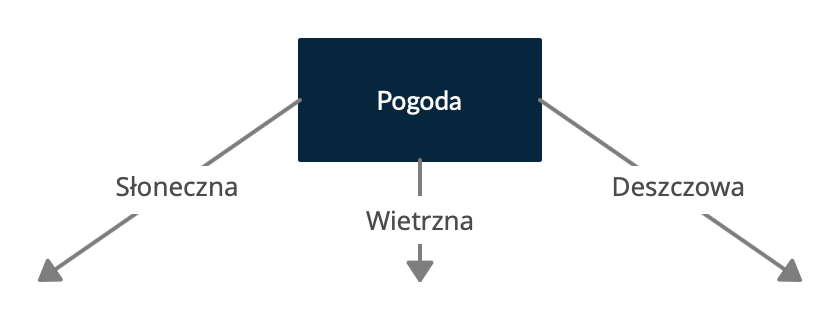

Po utworzeniu korzenia drzewa należy przyjrzeć się klasom decyzyjnym przypisanym wartościom atrybutu $S_{slonecznie}$.
Są to klasy {szczyt, dolina}, zatem krawędź $S_{slonecznie}$ nie zakończy się liściem drzewa decyzyjnego.
W tym celu należy wybrać kolejny atrybut, który rozdzieli obiekty należące do tego podzbioru.

Podobnie sytuacja wygląda w przypadku podzbioru $S_{wietrznie}$.

W tym celu należy wyznaczyć zysk informacyjny dla obiektów znajdujących się w podzbiorach gałęzi oraz atrybutów z wyjątkiem użytego przy budowie korzenia drzewa decyzyjnego.
Przy wyznaczaniu zysków informacyjnych należy brać pod uwagę tylko te atrybuty, które nie zostały wykorzystane w podziale wyższych poziomów drzewa decyzyjnego.

Rozważmy podzbiór obiektów dla odgałęzienia $$S_{slonecznie}$$

| LP | pogoda     | sezon letni | pora dnia  | cel wycieczki |
| -- | ---------- | ----------- | ---------- | ------------- |
| 1  | słonecznie | tak         | rano       | szczyt        |
| 2  | słonecznie | nie         | rano       | dolina        |
| 10 | słonecznie | nie         | rano       | dolina        |

$ Entropy(S_{slonecznie}) = 0.918 $
$ Gain(S_{slonecznie}, sezon letni) = 0.918 - \frac{|S_{tak}|}{|S|} Entropy(S_{tak}) - \frac{|S_{nie}|}{|S|} Entropy(S_{nie}) = $
$ 0.918 - \frac{1}{3} * 0 - \frac{2}{3} * 0 = 0.918 $

$ Gain(S_{slonecznie}, pora dnia) = 0 $

Zatem do podziału podzbioru $ S_{slonecznie} $ użyjemy atrybutu "sezon letni", który zachowuje większy zysk informacyjny.
Atrybut "pora dnia" dla tego podzbioru nie wnosi żadnej wartości.

Drzewo decyzyjne po podziale podzbioru $ S_{slonecznie} $ będzie wyglądało następująco:

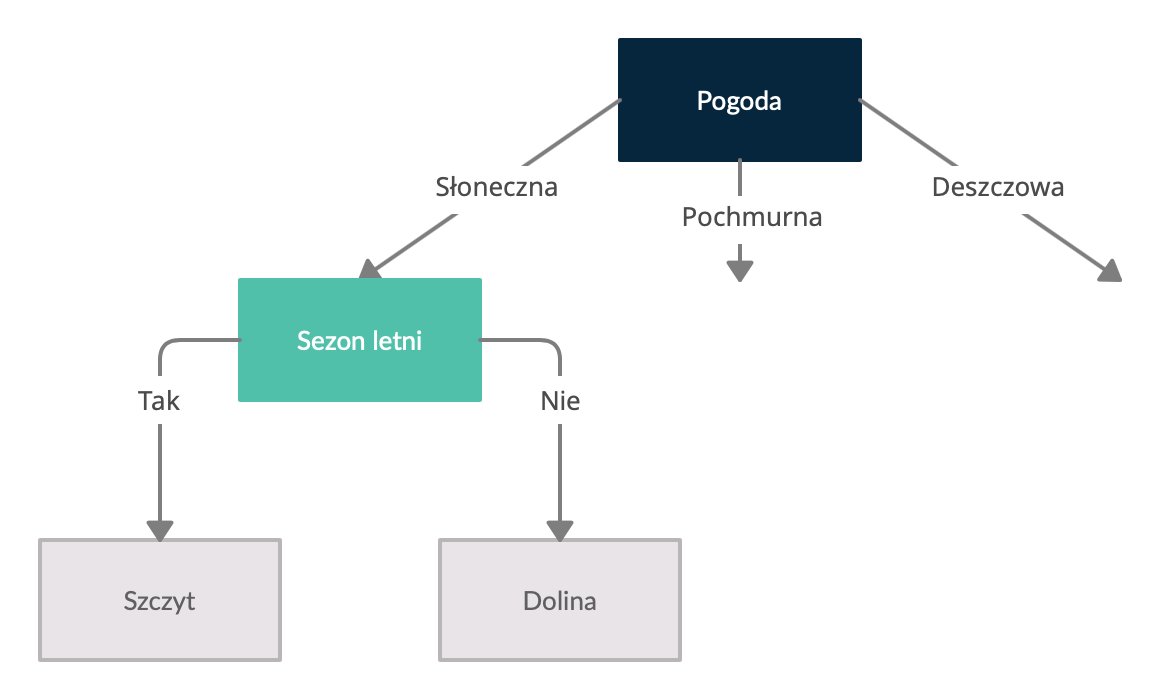

Powtarzając powyższy schemat można zbudować pełne drzewo decyzyjne, które dla przedstawionego systemu decyzyjnego prezentuje się następująco:

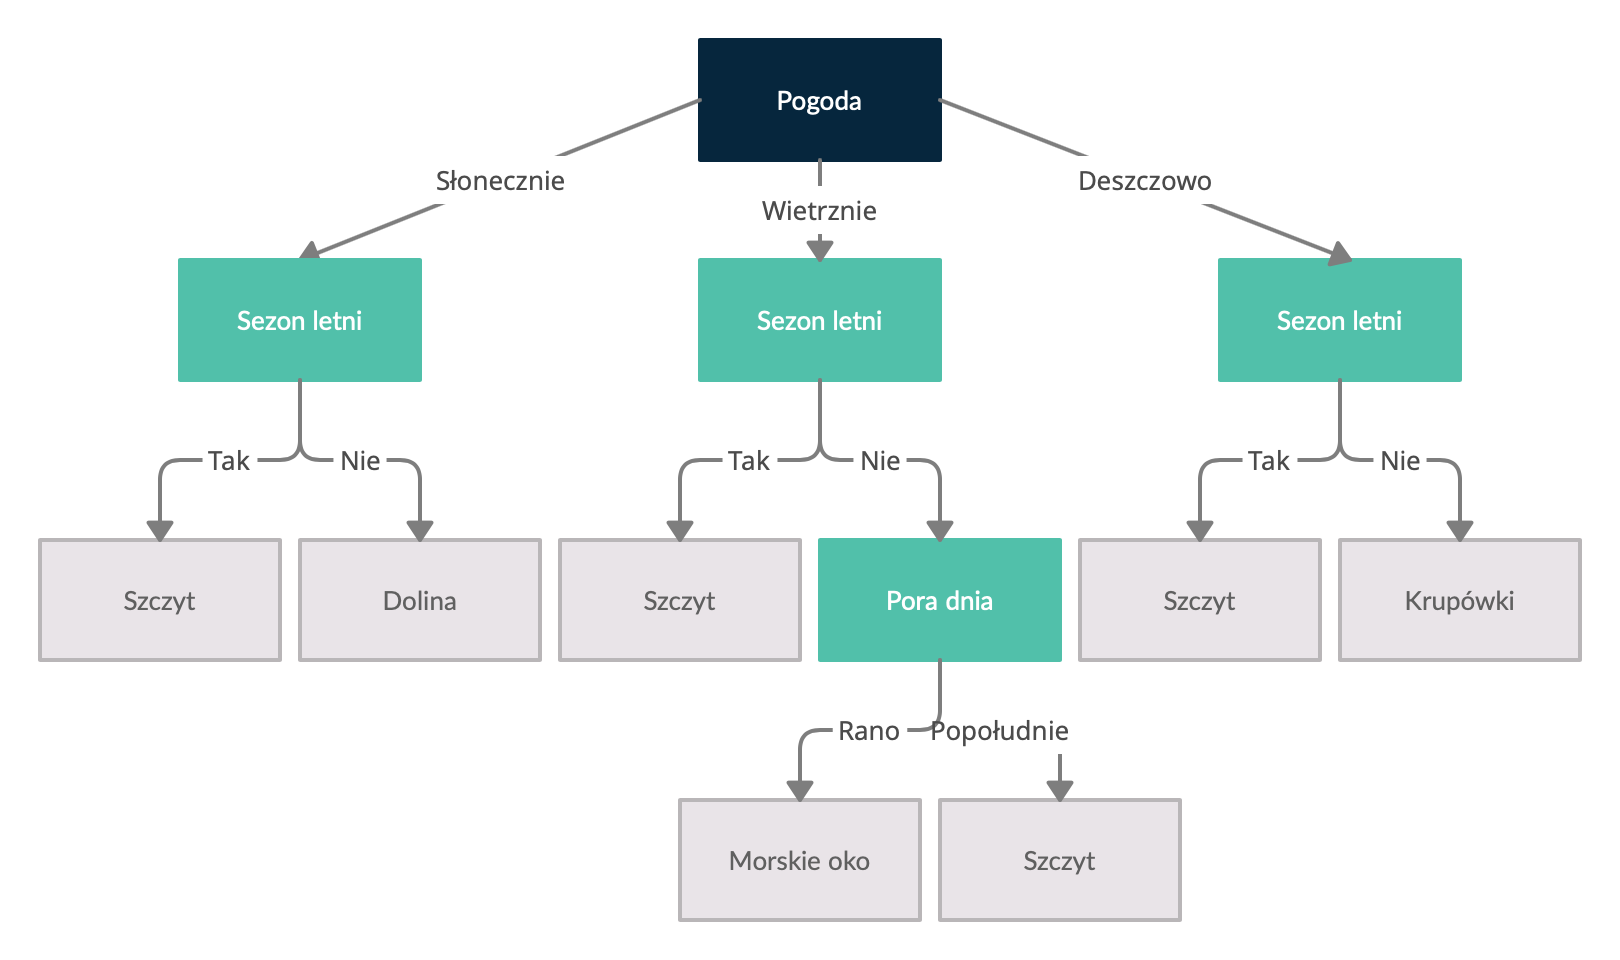

### Zadanie

Zbudować drzewo decyzyjne na podstawie następującego systemu decyzyjnego:

| Outlook  | Temp | Humidity | Windy | Play |
| -------- | ---- | -------- | ----- | ---- |
| Rainy    | Hot  | High     | f     | no   |
| Rainy	   | Hot  | High     | t	 | no   |
| Overcast | Hot  | High	 | f     | yes  |
| Sunny    | Mild |	High     | f     | yes  |
| Sunny    | Cool | Normal   | f     | yes  |
| Sunny    | Cool | Normal   | t     | no   |
| Overcast | Cool | Normal   | t     | yes  |
| Rainy    | Mild |	High     | f     | no   |
| Rainy    | Cool |	Normal   | f	 | yes  |
| Sunny    | Mild |	Normal	 | f     | yes  |
| Rainy    | Mild |	Normal	 | t	 | yes  |
| Overcast | Mild | High     | t     | yes  |
| Overcast | Hot  | Normal   | f     | yes  |
| Sunny    | Mild | High     | t     | no   |

Do narysowania drzewa można wykorzystać narzędzie https://app.diagrams.net

## Precyzja i czułość

Miary precyzji i czułości pozwalają na określenie jak klasyfikator radzi sobie z trafnością przydzielanych decyzji, co można wyrazić następującymi wzorami:

- $Precision = \frac{TP}{TP + FP}$
- $Sensitivity = \frac{TP}{TP + FN}$
- $Accuracy = \frac{TP + TN}{Total}$

gdzie:
- TP oznacza liczbę obiektów poprawnie sklasyfikowanych jako pozytywne
- TN oznacza liczbę obiektów poprawnie sklasyfikowanych jako negatywne
- FP oznacza liczbę obiektów fałszywie sklasyfikowanych jako pozytywne
- FN oznacza liczbę obiektów fałszywie sklasyfikowanych jako negatywne

Za pomocą precyzji można określić trafność klasyfikacji, czyli odsetek wszystkich pozytywnych obiektów, które zostały poprawnie sklasyfikowane.
Czułość służy do określania trafności wyszukiwania wszystkich pozytywnych obiektów, czyli odsetka obiektów sklasyfikowanych jako pozytywne spośród wszystkich pozytywnych obiektów.